In [43]:
# The dataset gives us electronics sales data at Amazon. 

# It contains user ratings for various electronics items sold, along with category of each item and time of sell.

# The dataset is available at https://www.kaggle.com/datasets/edusanketdk/electronics

# Importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# visualization

import seaborn as sns

# Importing the dataset

dataset = pd.read_csv('electronics.csv')

# List of first five rows

dataset.head()

,item_id,user_id,rating,timestamp,model_attr,category,brand,year,user_attr,split
0,0,0,5.0,1999-06-13,Female,Portable Audio & Video,NaN,1999,NaN,0
1,0,1,5.0,1999-06-14,Female,Portable Audio & Video,NaN,1999,NaN,0
2,0,2,3.0,1999-06-17,Female,Portable Audio & Video,NaN,1999,NaN,0
3,0,3,1.0,1999-07-01,Female,Portable Audio & Video,NaN,1999,NaN,0
4,0,4,2.0,1999-07-06,Female,Portable Audio & Video,NaN,1999,NaN,0


In [2]:
# List of last five rows

dataset.tail()

,item_id,user_id,rating,timestamp,model_attr,category,brand,year,user_attr,split
1292949,9478,1157628,1.0,2018-09-26,Female,Headphones,Etre Jeune,2017,NaN,0
1292950,9435,1157629,5.0,2018-09-26,Female,Computers & Accessories,NaN,2017,NaN,0
1292951,9305,1157630,3.0,2018-09-26,Female,Computers & Accessories,NaN,2016,NaN,0
1292952,9303,1157631,5.0,2018-09-29,Male,Headphones,NaN,2018,NaN,0
1292953,9478,1157632,1.0,2018-10-01,Female,Headphones,Etre Jeune,2017,Female,0


In [4]:
# shape

dataset.shape

(1292954, 10)

In [6]:
# Get the datatypes of all columns

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1292954 entries, 0 to 1292953
Data columns (total 10 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   item_id     1292954 non-null  int64  
 1   user_id     1292954 non-null  int64  
 2   rating      1292954 non-null  float64
 3   timestamp   1292954 non-null  object 
 4   model_attr  1292954 non-null  object 
 5   category    1292954 non-null  object 
 6   brand       331120 non-null   object 
 7   year        1292954 non-null  int64  
 8   user_attr   174124 non-null   object 
 9   split       1292954 non-null  int64  
dtypes: float64(1), int64(4), object(5)
memory usage: 98.6+ MB


In [7]:
# Convert timestamp Dtype from object to Date & Time format

from datetime import datetime

pd.to_datetime(dataset['timestamp'])

0         1999-06-13
1         1999-06-14
2         1999-06-17
3         1999-07-01
4         1999-07-06
             ...    
1292949   2018-09-26
1292950   2018-09-26
1292951   2018-09-26
1292952   2018-09-29
1292953   2018-10-01
Name: timestamp, Length: 1292954, dtype: datetime64[ns]

In [9]:
# We can also see that the column Product ID is of object data type, but it is actually a string.

# We can convert it to a string using the following code:

dataset['brand'] = dataset['brand'].astype(str)

# We can also see that the column Category is of object data type, but it is actually a string.

# We can convert it to a string using the following code:

dataset['category'] = dataset['category'].astype(str)

# We can also see that the column Timestamp is of int64 data type, but it is actually a timestamp.

# We can convert it to a timestamp using the following code:

dataset['timestamp'] = pd.to_datetime(dataset['timestamp'])

# We can also see that the column Rating is of int64 data type, but it is actually a float.

# We can convert it to a float using the following code:

dataset['rating'] = dataset['rating'].astype(float)

# We can also see that the column User ID is of int64 data type, but it is actually a string.

# We can convert it to a string using the following code:

dataset['user_id'] = dataset['user_id'].astype(str)

# We can also see that the column Product ID is of object data type, but it is actually a string.

# We can convert it to a string using the following code:

dataset['item_id'] = dataset['item_id'].astype(str)


In [10]:
dataset.describe()

,rating,year,split
count,1.292954e+06,1.292954e+06,1.292954e+06
mean,4.051482e+00,2.012938e+03,1.747587e-01
std,1.379732e+00,2.643513e+00,5.506810e-01
min,1.000000e+00,1.999000e+03,0.000000e+00
25%,4.000000e+00,2.012000e+03,0.000000e+00
50%,5.000000e+00,2.014000e+03,0.000000e+00
75%,5.000000e+00,2.015000e+03,0.000000e+00
max,5.000000e+00,2.018000e+03,2.000000e+00


In [14]:
dataset.nunique()

item_id          9560
user_id       1157633
rating              5
timestamp        6354
model_attr          3
category           10
brand              51
year               20
user_attr           2
split               3
dtype: int64

In [18]:
# Check for duplicates

dataset.duplicated().sum()

0

In [19]:
# Check for missing values

dataset.isnull().sum()

item_id             0
user_id             0
rating              0
timestamp           0
model_attr          0
category            0
brand               0
year                0
user_attr     1118830
split               0
dtype: int64

In [20]:
# Distributions of ratings

dataset['rating'].value_counts()

5.0    755755
4.0    214166
1.0    143755
3.0    100630
2.0     78648
Name: rating, dtype: int64

In [24]:
# best year of sales

dataset['year'] = pd.DatetimeIndex(dataset['timestamp']).year

dataset['year'].value_counts()

2015    320887
2016    302619
2017    192477
2014    180676
2013     99855
2018     80229
2012     38389
2011     23894
2010     16888
2009     12804
2008      9428
2007      6798
2006      2614
2005      2170
2004      1275
2003       833
2002       481
2001       403
2000       187
1999        47
Name: year, dtype: int64

In [ ]:
# 2015 was the best year of sales

In [79]:
# best month of sales

dataset['month'] = pd.DatetimeIndex(dataset['timestamp']).month

dataset['month'].value_counts()

1     140773
12    124597
3     116464
2     110546
8     109835
7     107612
4      99136
5      98207
9      97368
11     97015
6      96317
10     95084
Name: month, dtype: int64

In [26]:
# January was the best month of sales

In [28]:
# drop all null values

dataset.dropna(inplace=True)

# Finding answers with the data we have with the visualizations

<AxesSubplot:xlabel='rating', ylabel='count'>

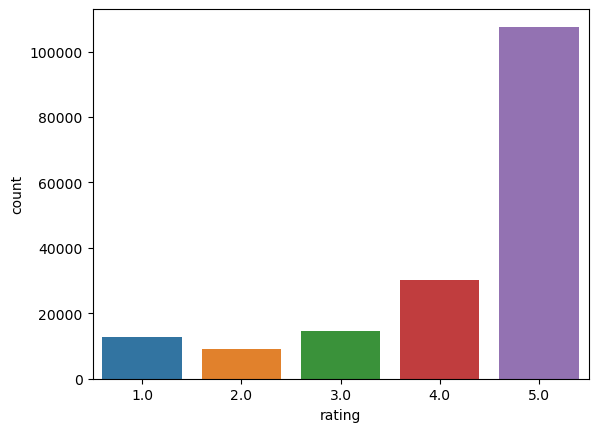

In [32]:
# The distribution of ratings

sns.countplot(x='rating', data=dataset)


In [35]:
# Distributions of ratings

dataset['rating'].value_counts()

5.0    107593
4.0     30104
3.0     14593
1.0     12652
2.0      9182
Name: rating, dtype: int64

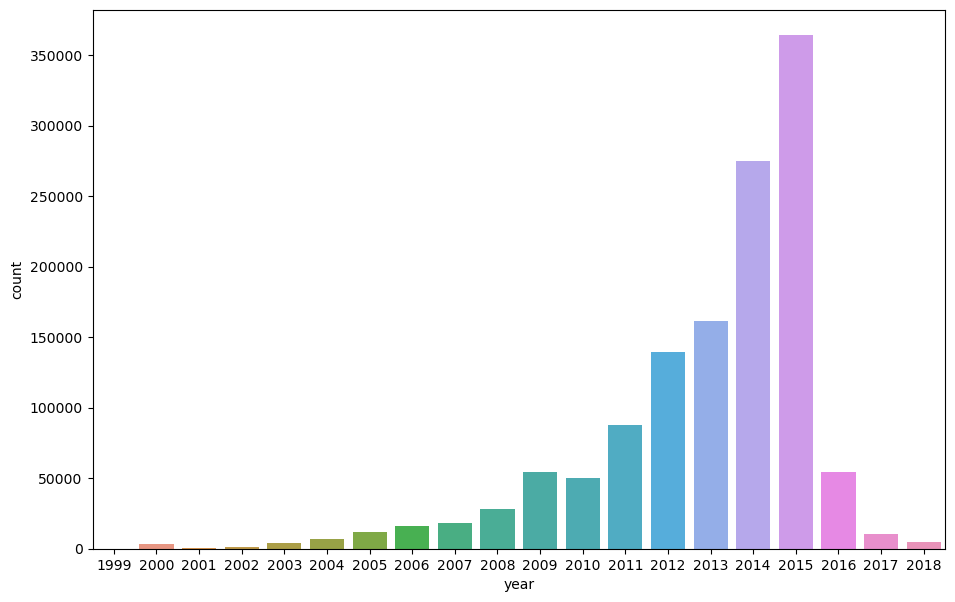

In [49]:
# Distributions of sales by year
plt.figure(figsize=(11,7))
sns.countplot(x='year', data=dataset)
plt.show()

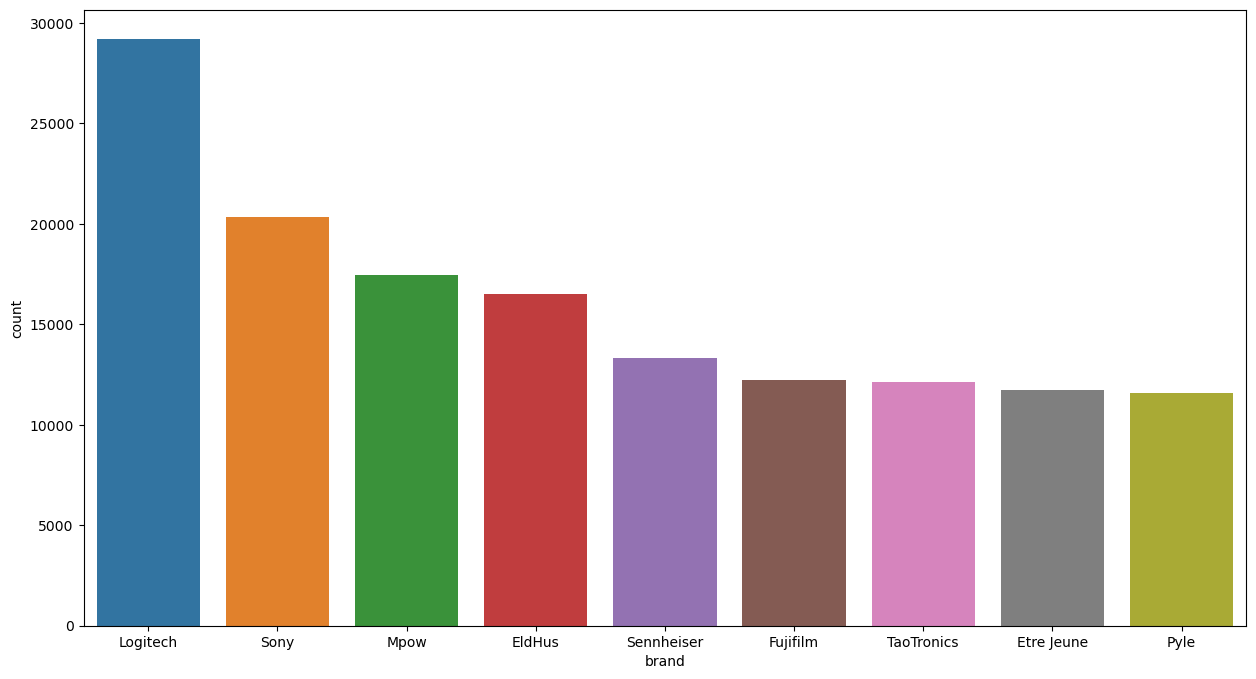

In [53]:
# Brands with most sales

plt.figure(figsize=(15,8))
sns.countplot(x='brand', data=dataset, order=dataset['brand'].value_counts().iloc[1:10].index)
plt.show()

In [62]:
# Logitech & Sony had the most sales followed by Mpow.


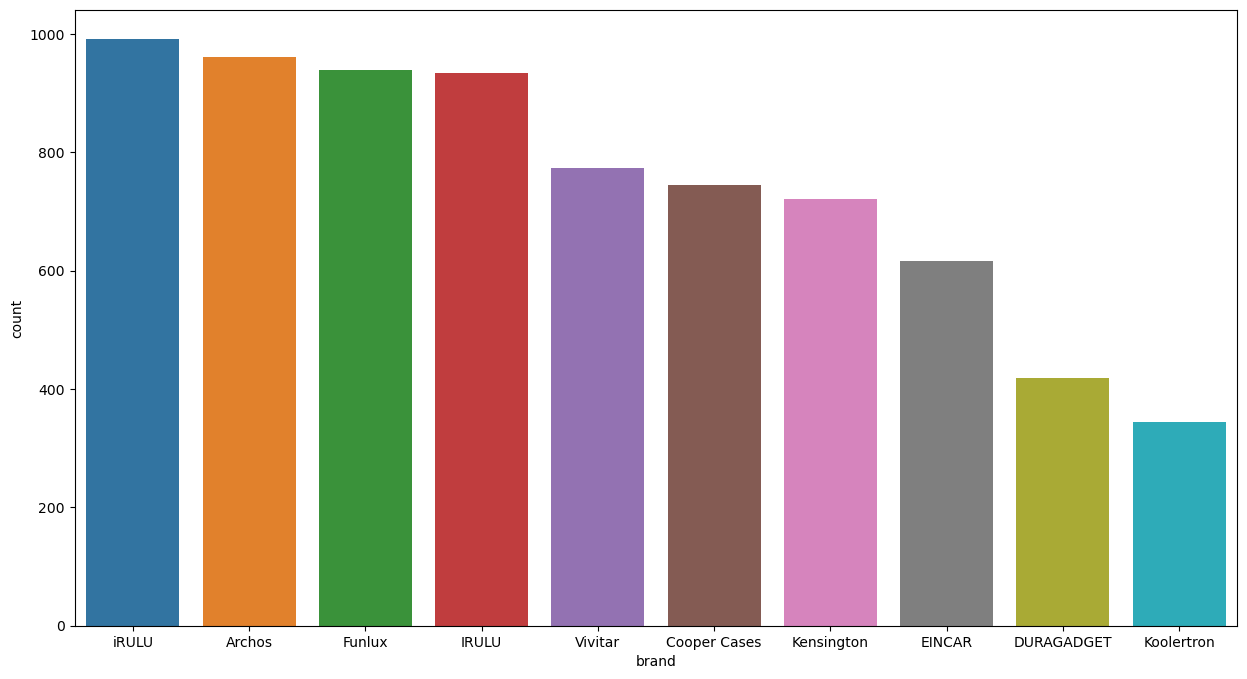

In [64]:
# Brand sold the least

plt.figure(figsize=(15,8))
sns.countplot(x='brand', data=dataset, order=dataset['brand'].value_counts().iloc[-10:].index)
plt.show()

In [66]:
# Koolertron had the least sales among all

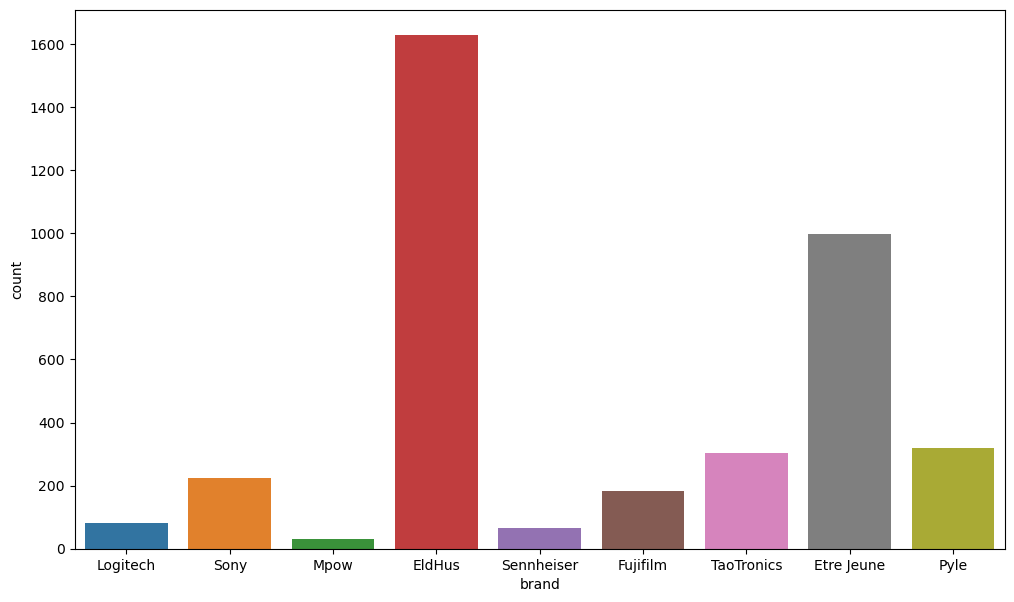

In [72]:
# Brand with the most sales in year 2016

plt.figure(figsize=(12,7))
sns.countplot(x='brand', data=dataset[dataset['year'] == 2016], order=dataset['brand'].value_counts().iloc[1:10].index)
plt.show()

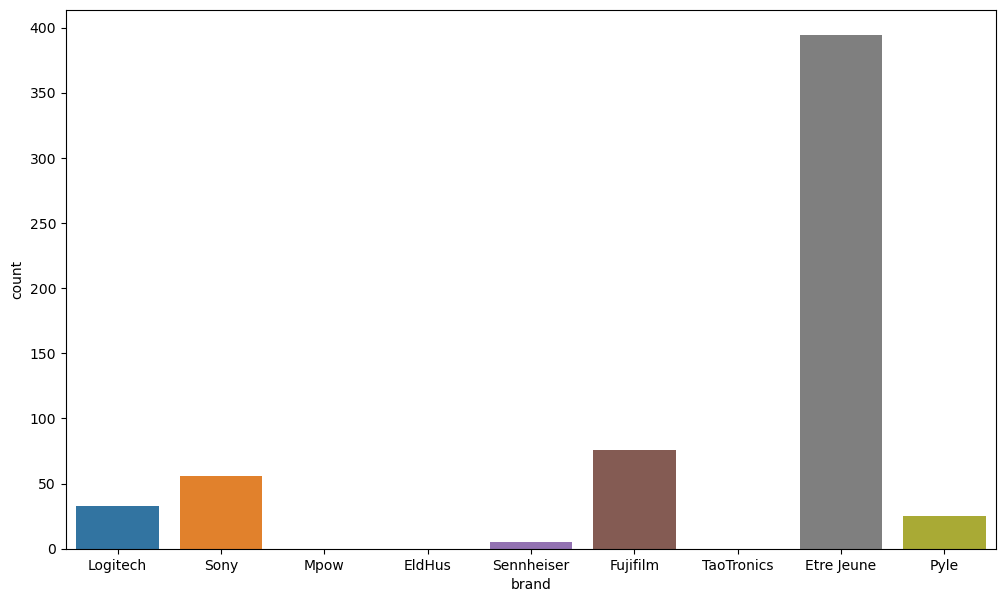

In [73]:
# Brand with the most sales in year 2017

plt.figure(figsize=(12,7))
sns.countplot(x='brand', data=dataset[dataset['year'] == 2017], order=dataset['brand'].value_counts().iloc[1:10].index)
plt.show()

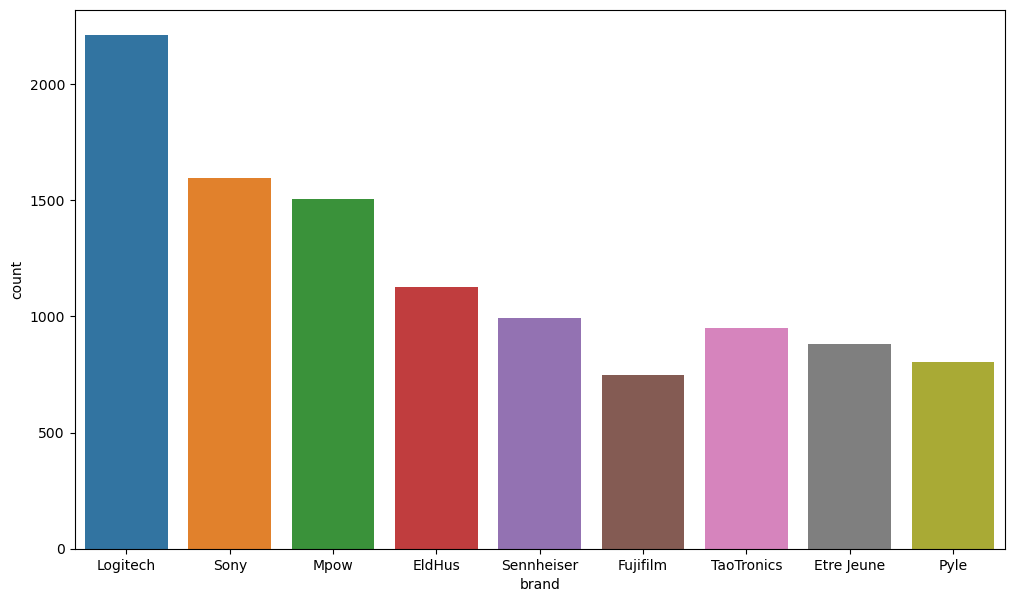

In [80]:
# Brand with the most sales in year 2018

plt.figure(figsize=(12,7))
sns.countplot(x='brand', data=dataset[dataset['year'] == 2018], order=dataset['brand'].value_counts().iloc[1:10].index)
plt.show()

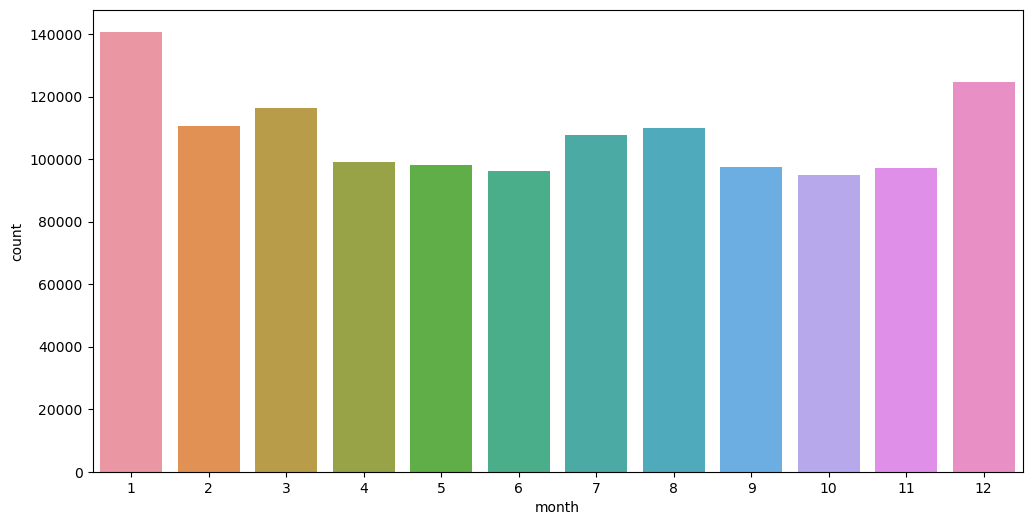

In [82]:
# month with most sales

plt.figure(figsize=(12,6))
sns.countplot(x='month', data=dataset)
plt.show()

In [84]:
# January was the month with most sales

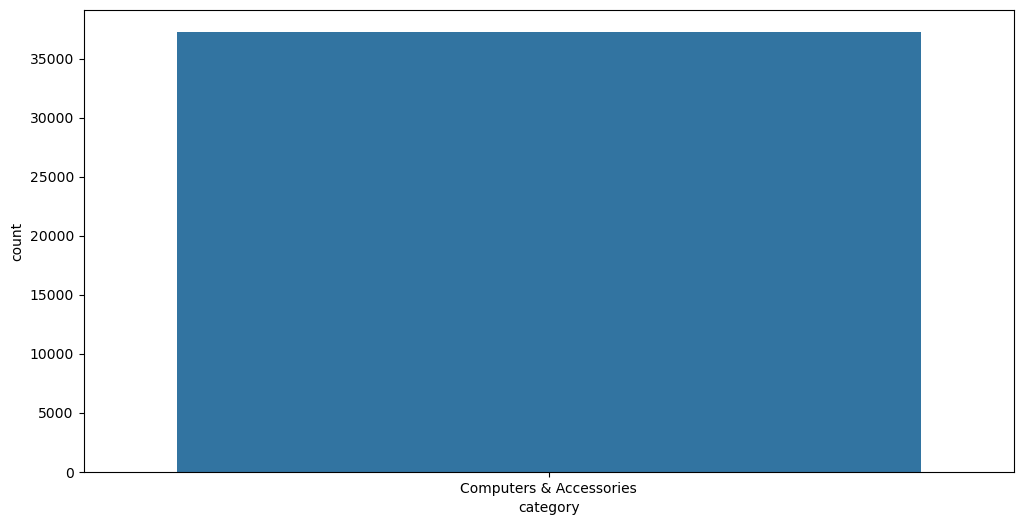

In [86]:
# Products by category were sold the most in January

plt.figure(figsize=(12,6))
sns.countplot(x='category', data=dataset[dataset['month'] == 1], order=dataset['category'].value_counts().iloc[1:2].index)
plt.show()

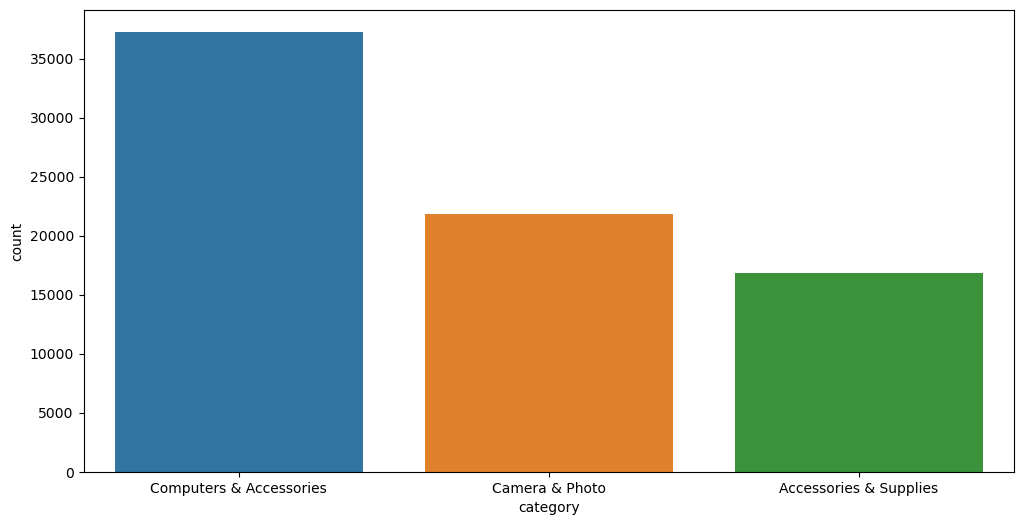

In [93]:
# Products by category were sold the most 3 in January

plt.figure(figsize=(12,6))
sns.countplot(x='category', data=dataset[dataset['month'] == 1], order=dataset['category'].value_counts().iloc[1:4].index)
plt.show()

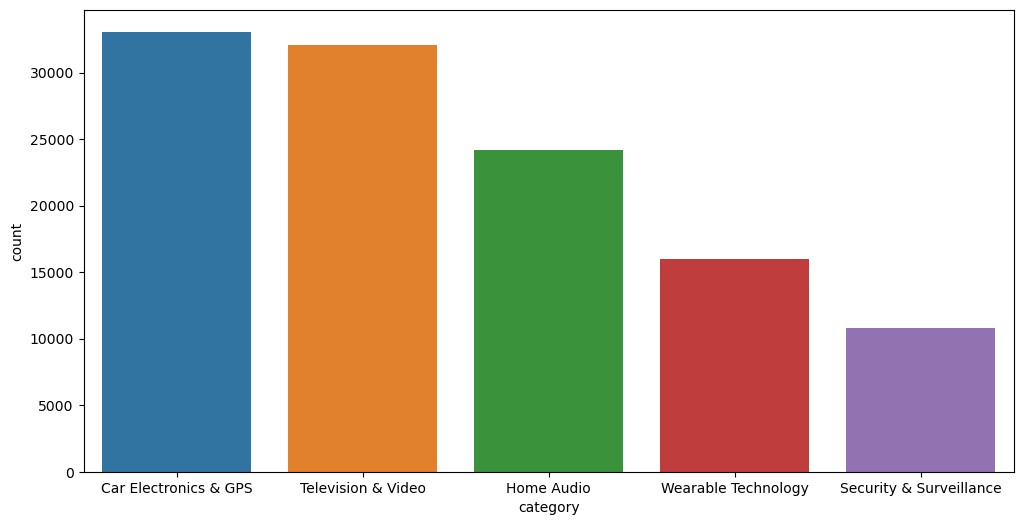

In [92]:
# Category with the least 5 sales

plt.figure(figsize=(12,6))
sns.countplot(x='category', data=dataset, order=dataset['category'].value_counts().iloc[-5:].index)
plt.show()

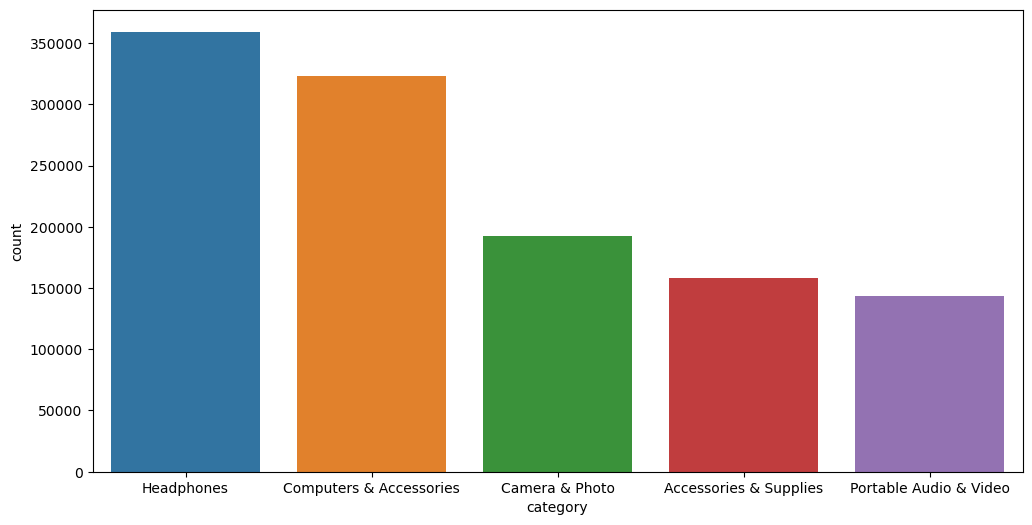

In [95]:
# Category with the most 5 sales

plt.figure(figsize=(12,6))
sns.countplot(x='category', data=dataset, order=dataset['category'].value_counts().iloc[:5].index)
plt.show()

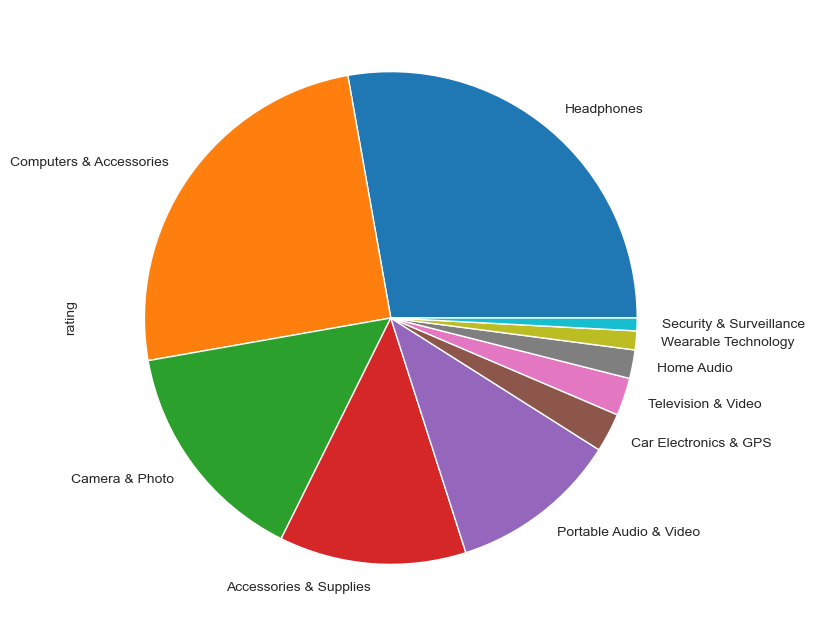

In [98]:
# distribution of sales presented in a pie chart
plt.figure(figsize=(16,8))
dataset['category'].value_counts(normalize=True)
dataset.groupby('category')['rating'].count().sort_values(ascending=False).head(10).plot(kind='pie')

# white background

sns.set_style('white')
plt.show()

# Conclusion of our analysis


In [ ]:

# We can see that the year 2015 had the best sales.

# The month of January had the best sales.

# We can see that the brands Logitech and sony sold the most

# We can see that the category of Headphones sold the most.

# We can see that the brand name of Koolertron sold the least.

# We can see that the category of Security and Surveillance sold the least.